In [103]:
import pandas as pd
import numpy as np
f = open("PhaseDiagramData.txt", 'r')
N, chi, nlanes = [], [], []

for line in f:
    N.append(int(line.split()[0]))
    chi.append(float(line.split()[1]))
    nlanes.append(int(line.split()[2]))
    
data = list(zip(N, chi, nlanes))
df = pd.DataFrame(data, columns = ['N', 'chi', 'nlanes'])

In [104]:
df.head()

,N,chi,nlanes
0,10,0.00,4
1,10,0.05,6
2,10,0.10,5
3,10,0.15,6
4,10,0.20,8


In [105]:
conditions = [
    (df['nlanes'] < 2),
    (df['nlanes'] == 2),
    (df['nlanes'] > 2) & (df['nlanes'] <= 10),
    (df['nlanes'] > 10)
]

values = ['chaotic', 'two_lanes',  'several_lanes', 'many_lanes']

df['phase'] = np.select(conditions, values)

In [106]:
df.head()

,N,chi,nlanes,phase
0,10,0.00,4,several_lanes
1,10,0.05,6,several_lanes
2,10,0.10,5,several_lanes
3,10,0.15,6,several_lanes
4,10,0.20,8,several_lanes


Text(0.5, 0, 'density')

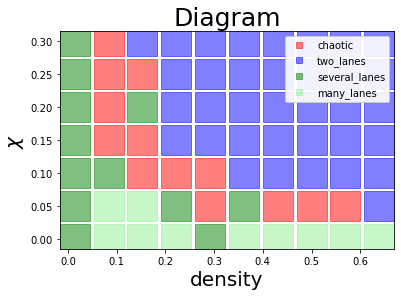

In [102]:
import matplotlib.pyplot as plt
colors = ['red', 'blue', 'green', 'lightgreen']

#fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for i in range(4):
    plt.plot(df[df.phase == values[i]].N/12/60, 
             df[df.phase == values[i]].chi, 'ro',
             color = colors[i], ms = 30, marker = "s", label = values[i], alpha = 0.5)
plt.legend(loc = 'upper right', markerscale = 0.2, framealpha = 0.9)
plt.title('Diagram', fontsize = 25)
plt.ylabel('$\chi$', fontsize = 20)
plt.xlabel('density', fontsize = 20)